In [42]:
# librerias
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img, img_to_array

In [43]:
# Ruta al dataset
data_dir = "./dataset_final"

# Parámetros
img_height, img_width = 64, 64  # puedes ajustar según tus imágenes
batch_size = 32

# Cargar dataset dividido en entrenamiento y validación
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# #calcular el total de imágenes en cada conjunto
# total_train = sum(1 for _ in train_ds.unbatch())
# total_val = sum(1 for _ in val_ds.unbatch())

# print("Total de imágenes de entrenamiento:", total_train)
# print("Total de imágenes de validación:", total_val)

# Guardar las clases
class_names = train_ds.class_names
num_classes = len(class_names)
print("Clases:", class_names)

# Normalizar después
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

Found 7062 files belonging to 7 classes.
Using 5650 files for training.
Found 7062 files belonging to 7 classes.
Using 1412 files for validation.
Clases: ['confundido', 'enojado', 'feliz', 'muerto', 'neutral', 'sorprendida', 'triste']


In [44]:
num_classes = len(class_names)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4823 - loss: 1.3647 - val_accuracy: 0.7790 - val_loss: 0.7349
Epoch 2/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8163 - loss: 0.5257 - val_accuracy: 0.9016 - val_loss: 0.2666
Epoch 3/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9189 - loss: 0.2407 - val_accuracy: 0.9221 - val_loss: 0.2151
Epoch 4/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9596 - loss: 0.1316 - val_accuracy: 0.9582 - val_loss: 0.1114
Epoch 5/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9720 - loss: 0.0808 - val_accuracy: 0.9639 - val_loss: 0.1112
Epoch 6/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9812 - loss: 0.0617 - val_accuracy: 0.9731 - val_loss: 0.0885
Epoch 7/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9811 - loss: 0.0599 - val_accuracy: 0.9773 - val_loss: 0.0788
Epoch 8/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9809 - loss: 0.0571 - val_accu

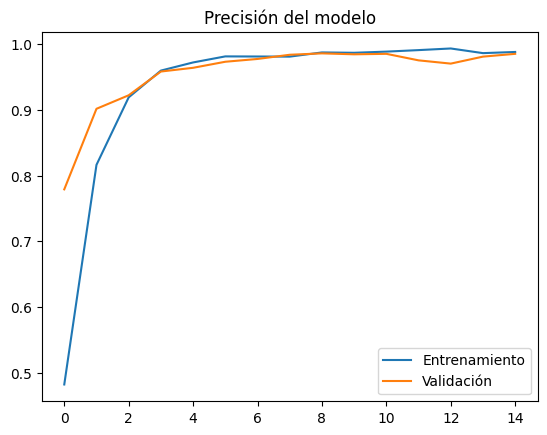

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt
plt.plot(acc, label='Entrenamiento')
plt.plot(val_acc, label='Validación')
plt.legend()
plt.title('Precisión del modelo')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

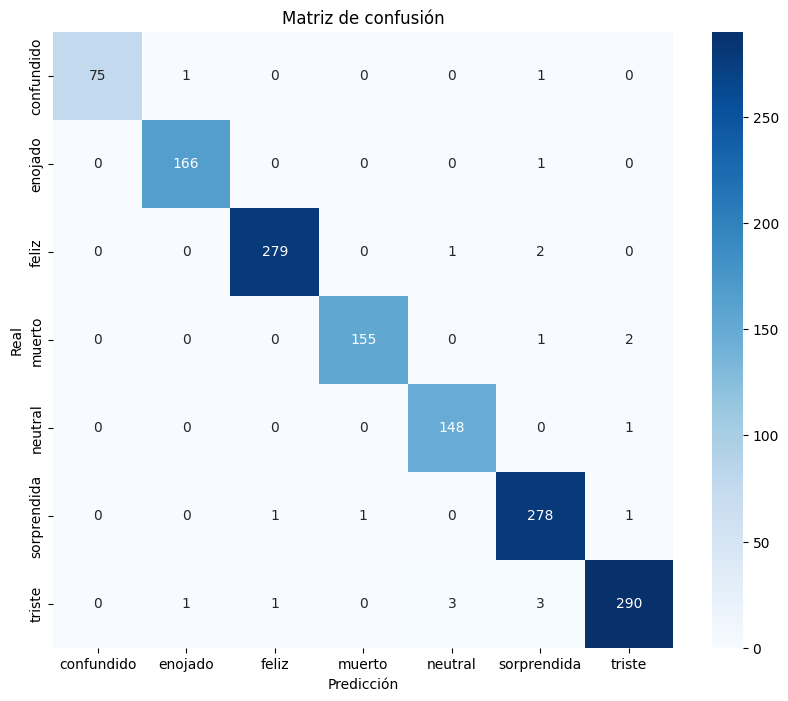

Reporte de clasificación:
              precision    recall  f1-score   support

  confundido       1.00      0.97      0.99        77
     enojado       0.99      0.99      0.99       167
       feliz       0.99      0.99      0.99       282
      muerto       0.99      0.98      0.99       158
     neutral       0.97      0.99      0.98       149
 sorprendida       0.97      0.99      0.98       281
      triste       0.99      0.97      0.98       298

    accuracy                           0.99      1412
   macro avg       0.99      0.98      0.99      1412
weighted avg       0.99      0.99      0.99      1412



In [47]:

# Obtener predicciones sobre el set de validación
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Convertir a arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

# Reporte de métricas
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [48]:

import os

INPUT_ROOT = "./pruebas"

# Iterate files in the folder instead of iterating the string path
for filename in os.listdir(INPUT_ROOT):
    img_path = os.path.join(INPUT_ROOT, filename)

    try:
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        pred_class = class_names[np.argmax(predictions)]
        print(f"Imagen: {img_path} - Predicción: {pred_class}")
    except PermissionError:
        print(f"Sin permiso para leer: {img_path}")
    except Exception as e:
        print(f"Error al procesar {img_path}: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Imagen: ./pruebas\confundido.png - Predicción: triste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Imagen: ./pruebas\confundido7.png - Predicción: confundido
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Imagen: ./pruebas\enojado3.png - Predicción: enojado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Imagen: ./pruebas\enojado4.png - Predicción: enojado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Imagen: ./pruebas\feliz2.png - Predicción: feliz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Imagen: ./pruebas\muerto.png - Predicción: muerto
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Imagen: ./pruebas\muerto2.png - Predicción: muerto
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Imagen: ./pruebas\muerto3.png - Predicción: muerto
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Imagen: ./pruebas\muerto4.png - Predicción: muerto
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Imagen: ./pruebas\neutral.png - Predicción: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Imagen: ./pruebas\neutral2.png - Predicción: neutral
1/1 ━━